In [100]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.genfromtxt('ex1data1', delimiter=',')
x = data[:,[0]]
y = data[:,1]

x = np.insert(x, 0, np.ones(x.size), axis=1)
theta = np.array([0., 0.])

In [101]:
def cost_function(x, y, theta):
    m = y.size
    regression = x.dot(theta)
    regressionError = np.sum((regression - y)**2)
    return ((1./(2*m))*regressionError)

In [102]:
print(cost_function(x, y, theta))

32.0727338775


Os dois termos principais do Gradiente Descendente são o \alpha e o termo derivativo.

O componente \alpha do gradiente descendente é um escalar utilizado para regular a taxa de aprendizado. Pode ser interpretado como o "tamanho do passo" que será dado pelo vetor gradiente. Quanto maior o \alpha, mais agressiva a taxa de aprendizado.

In [103]:
def gradient_descent(x, y, theta, alpha, tolerance):
    m = y.size
    episilon  = 0.000000001
    residual  = np.ones(tolerance)
    interact = 0
    converge = False
    while not converge:
        ' Start adjusting theta values '
        hypothesis   = x.dot(theta)
        error        = (hypothesis - y)
        gradient     = (1./m)*(x.T.dot(error))
        
        theta = theta - (alpha)*(gradient)
        
        ' Run the cost function over the data with new theta '
        residual[interact] = cost_function(x, y, theta)
        
        if interact % 100 == 0:
            print('Interaction ' + str(interact) + ' - Residual cost '+ str(residual[interact]))
        
        ' Verify convergence over the given episilon and residual given step, also verify tolerance tries '
        if interact > 0:
            converge = (abs(residual[interact] - residual[interact - 1])<episilon)
        
        if (interact + 1) == tolerance:
            converge = True
            
        interact = interact + 1
        
    return theta, residual, interact

In [104]:
(t,r,i) = gradient_descent(x, y, theta, 0.01, 1500)

print('Last interaction was '+str(i))
print(t)

Interaction 0 - Residual cost 6.73719046487
Interaction 100 - Residual cost 5.47636281727
Interaction 200 - Residual cost 5.17363455117
Interaction 300 - Residual cost 4.96260649312
Interaction 400 - Residual cost 4.81550149412
Interaction 500 - Residual cost 4.71295645375
Interaction 600 - Residual cost 4.64147359881
Interaction 700 - Residual cost 4.59164380177
Interaction 800 - Residual cost 4.55690807841
Interaction 900 - Residual cost 4.53269424354
Interaction 1000 - Residual cost 4.5158150845
Interaction 1100 - Residual cost 4.50404883552
Interaction 1200 - Residual cost 4.49584673168
Interaction 1300 - Residual cost 4.49012914849
Interaction 1400 - Residual cost 4.48614349332
Last interaction was 1500
[-3.63029144  1.16636235]


Predicting values for 35.000 population

In [105]:
p = np.array([1., 35.000]).dot(t)
print(p)

37.1923908223


Predicting values for 70.000 population 

In [106]:
p = np.array([1., 70.000]).dot(t)
print(p)

78.0150730841


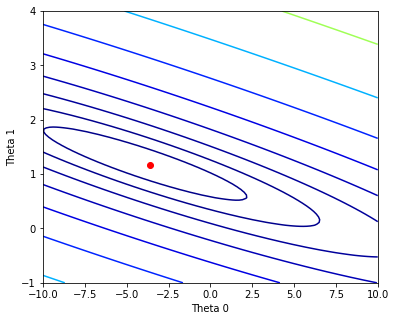

In [107]:
' Prepare grid interval and theta interval  '

plt.close('all')

interval_0 = np.linspace(-10, 10, 100)
interval_1 = np.linspace(-1, 4, 100)

(t0, t1) = np.meshgrid(interval_0, interval_1, indexing='xy')

' Filling costs '
j_history = np.zeros(shape=t0.shape)

' Generating bidimensional array '
for (i, j), element in np.ndenumerate(costs):
    theta = np.array([t0[i,j], t1[i,j]])
    j_history[i,j] = cost_function(x, y, theta)

fig1 = plt.figure(figsize=(6,5))
ax = plt.contour(t0, t1, j_history, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
plt.scatter(t[0], t[1], c='r')

plt.xlabel('Theta 0')
plt.ylabel('Theta 1')

plt.show()

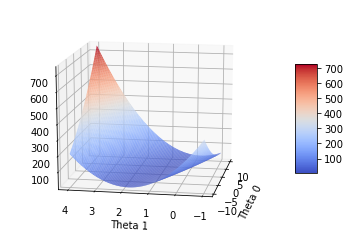

In [117]:
' Surface graphics '

plt.close('all')

fig = plt.figure()
ax = fig.gca( projection='3d')

surf = ax.plot_surface(t0, t1, j_history, rstride=1, cstride=1, alpha=1, cmap=plt.cm.coolwarm)

# Customize the z axis
zmin = j_history.min()
zmax = j_history.max()

ax.set_zlim(zmin, zmax)
ax.view_init(elev=15, azim=190)

plt.xlabel('Theta 0')
plt.ylabel('Theta 1')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
